<a href="https://colab.research.google.com/github/chandansinghthakur/ML_assignments/blob/main/Logistic_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic_Regression_Assignment**

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.


#**Dataset**

The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

Description of Variables

The dataset contains 6366 observations of 9 variables:
     
   rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
   very good)
   age: woman's age
   yrs_married: number of years married
  children: number of children
  religious: woman's rating of how religious she is (1 = not religious, 4     =strongly religious)
   educ: level of education (9 = grade school, 12 = high school, 14 =
  some college, 16 = college graduate, 17 = some graduate school, 20
  = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =     teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs


Code to loading data and modules:

import numpy as np

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

from patsy import dmatrices

from sklearn.linear_model

import LogisticRegression from

sklearn.cross_validation

import train_test_split from sklearn

import metrics from

sklearn.cross_validation

import cross_val_score dta =

sm.datasets.fair.load_pandas().data

add "affair" column: 1 represents having affairs, 0
represents not dta['affair'] = (dta.affairs >
0).astype(int)

y, X = dmatrices('affair ~ rate_marriage + age +
yrs_married + children + \ religious + educ +
C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',

'C(occupation)[T.4.0]':'occ_4',

'C(occupation)[T.5.0]':'occ_5',

'C(occupation)[T.6.0]':'occ_6',

'C(occupation_husb)[T.2.0]':'occ_husb_2',

'C(occupation_husb)[T.3.0]':'occ_husb_3',

'C(occupation_husb)[T.4.0]':'occ_husb_4',

'C(occupation_husb)[T.5.0]':'occ_husb_5',

'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


# **Load the dataset and import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

df = sm.datasets.fair.load_pandas().data

In [2]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
df.shape

(6366, 9)

In [4]:
#add "affair" column: 1 represents having affairs, 0 represents not having affair
df['affair'] = (df.affairs > 0).astype(int)

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
# data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [7]:
# dataset description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.000000,5.000000
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.000000,42.000000
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.500000,23.000000
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.000000,5.500000
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.000000,4.000000
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.000000,20.000000
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.000000,6.000000
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.000000,6.000000
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991
affair,6366.0,0.322495,0.467468,0.0,0.0,0.0,1.000000,1.000000


# **Exploratory Data Analysis**

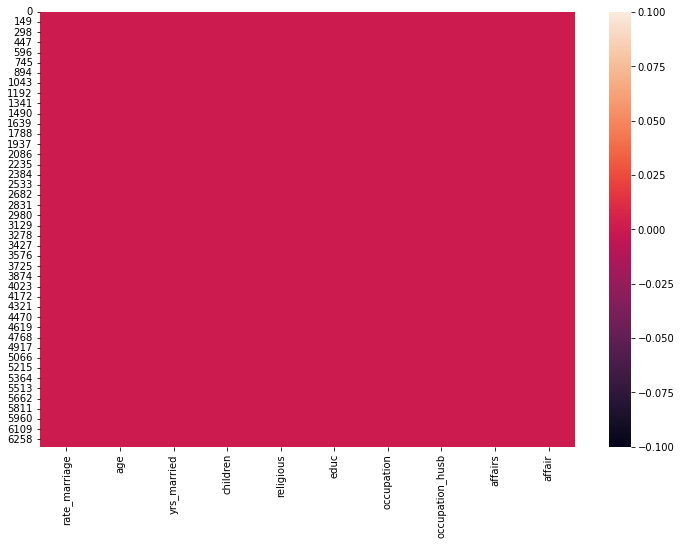

In [8]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.show()

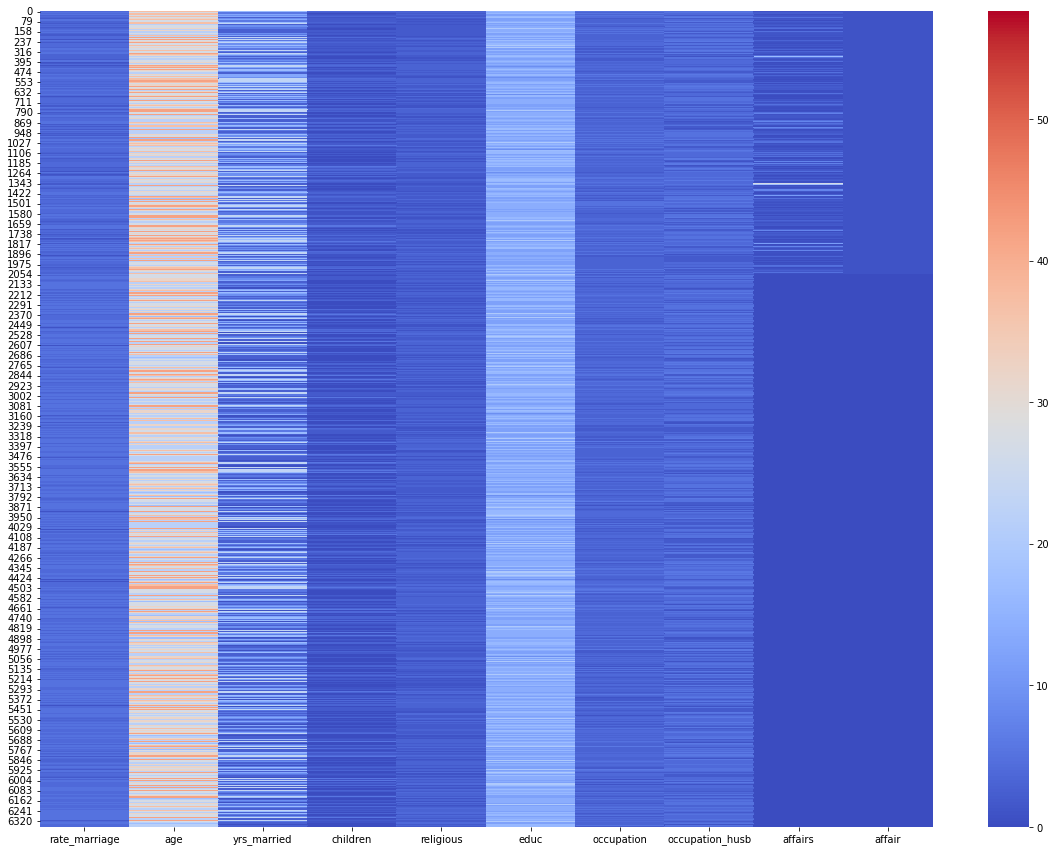

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df,cmap='coolwarm')
plt.show()

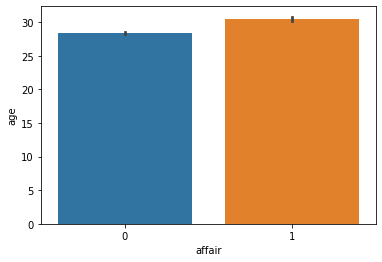

In [10]:
sns.barplot(x='affair', y='age', data=df)


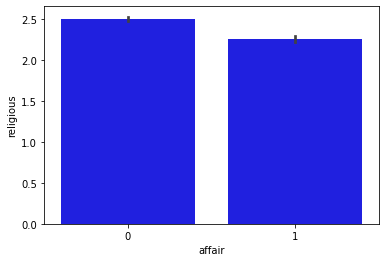

In [11]:
sns.barplot(x='affair', y='religious', data=df, color="blue")

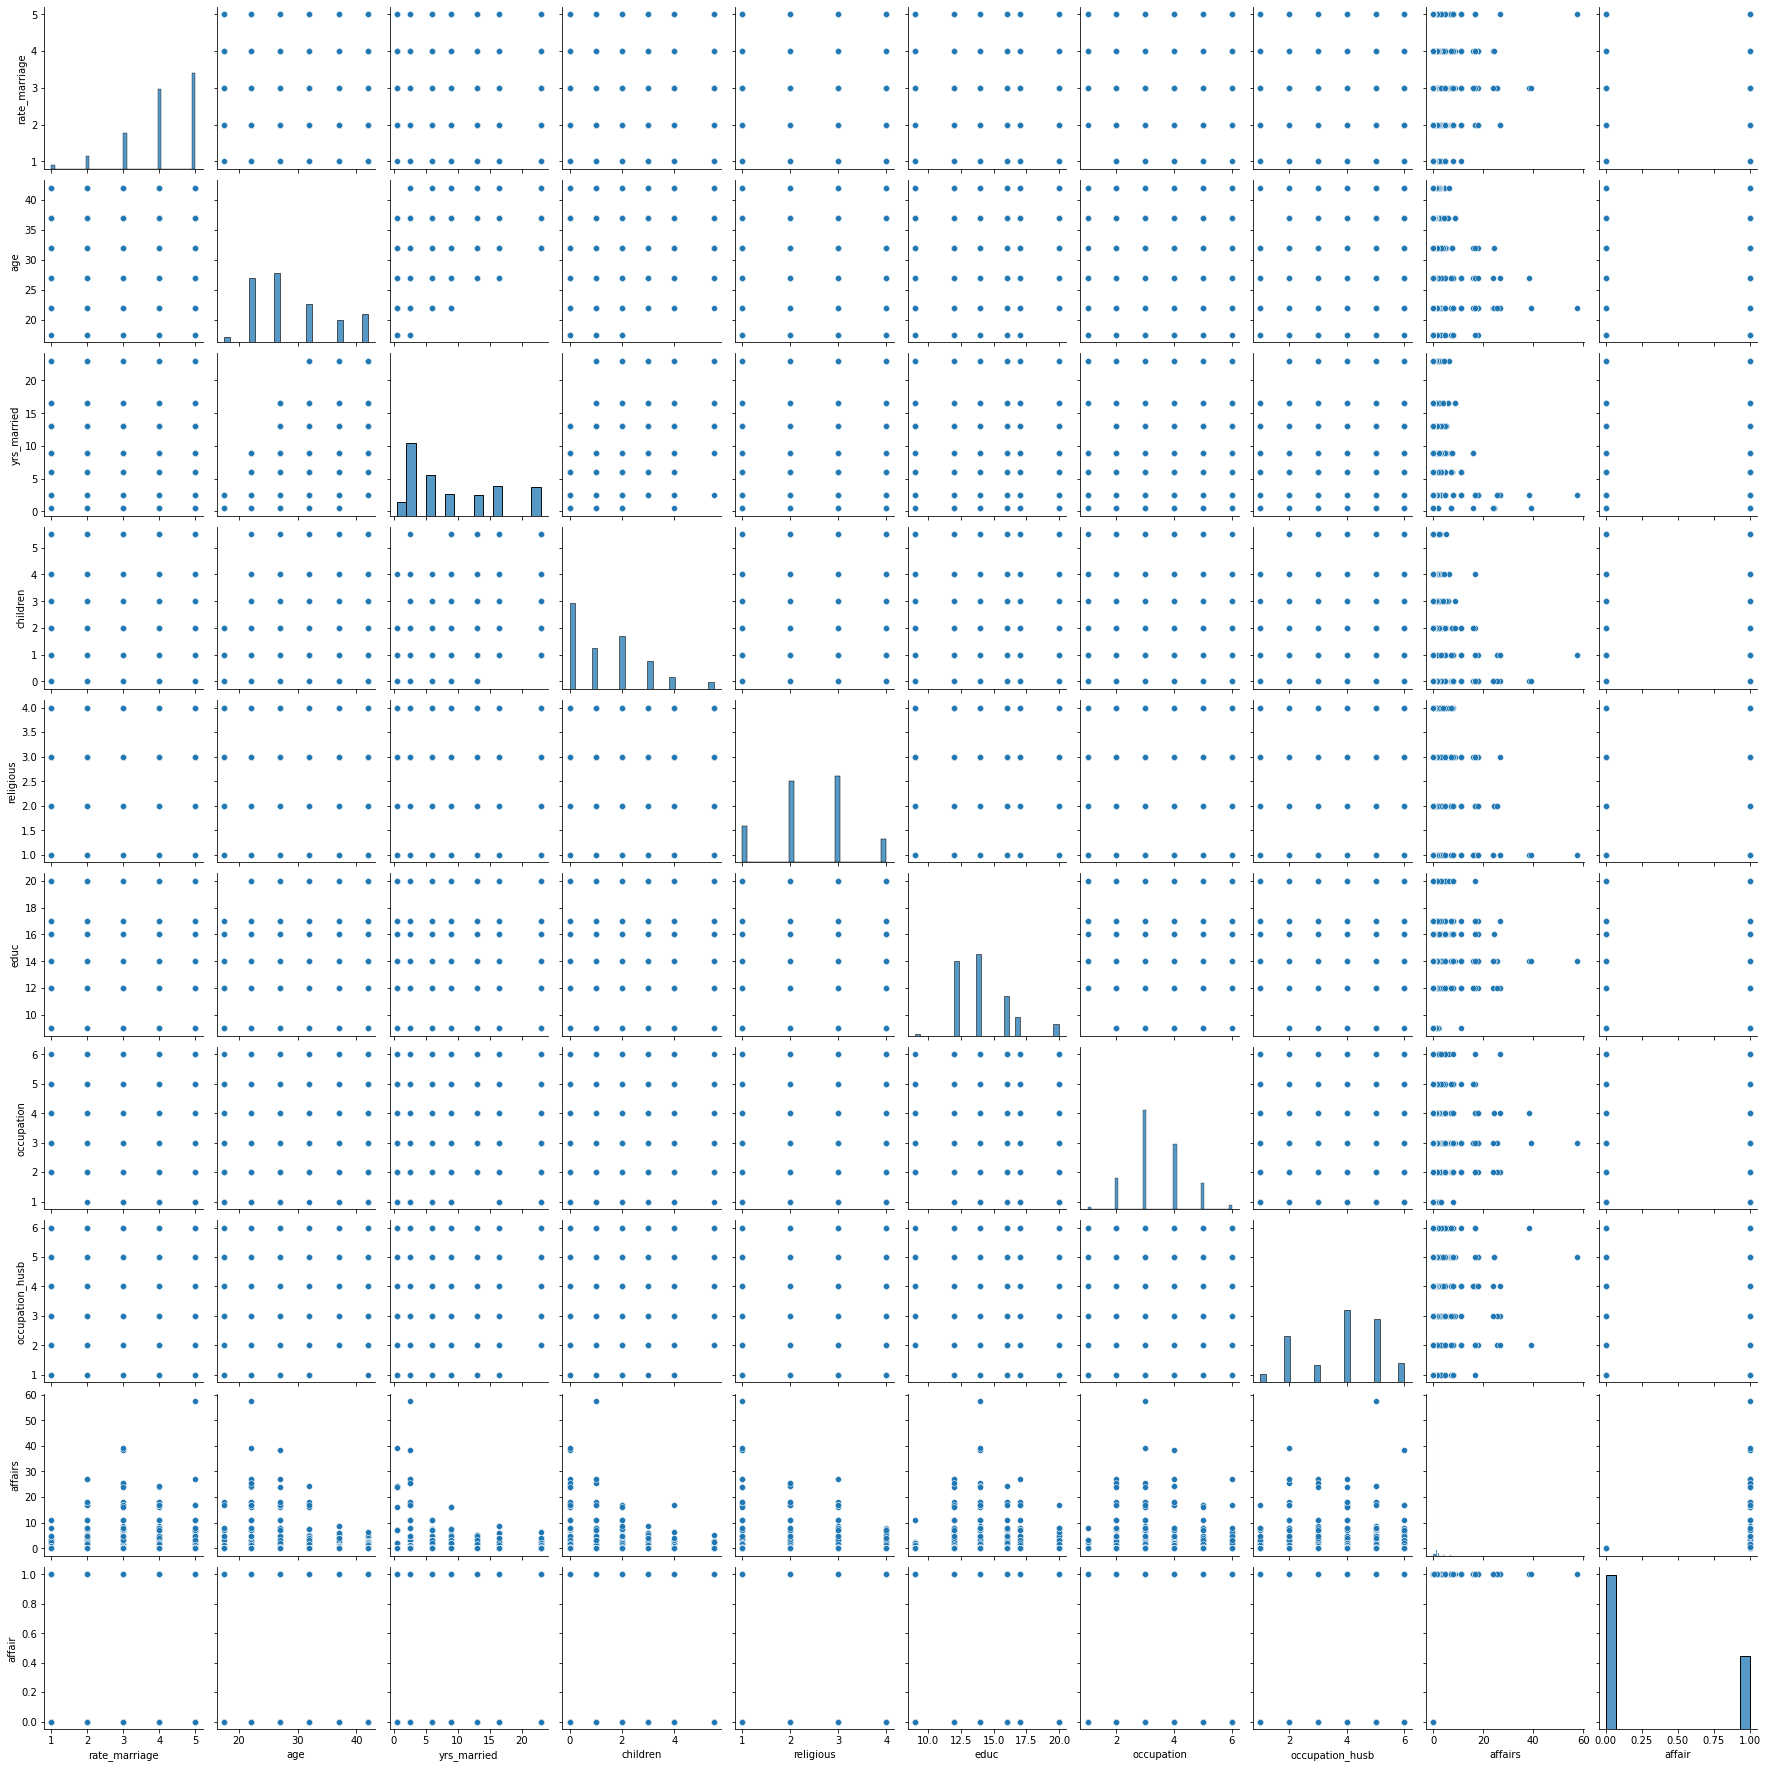

In [12]:
sns.pairplot(df)

Text(0, 0.5, 'Frequency')

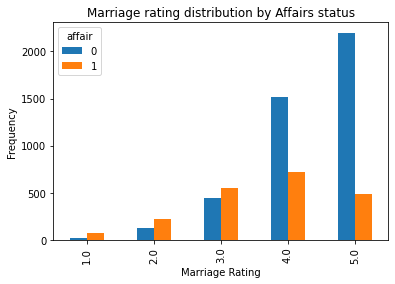

In [13]:
# barplot of marriage rating grouped by affair
pd.crosstab(df.rate_marriage, df.affair).plot(kind='bar')
plt.title("Marriage rating distribution by Affairs status")
plt.xlabel("Marriage Rating")
plt.ylabel("Frequency")

From the above barplot, we can observe that the affair is incresing with the marriage rating i.e. highest the marriage rating , higher the number of affairs.

Text(0, 0.5, 'Percentage')

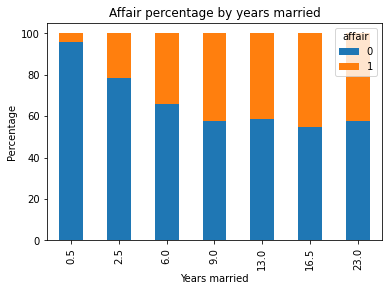

In [14]:
affairs_yrs_married = pd.crosstab(df.yrs_married, df.affair)
affairs_yrs_married.div(affairs_yrs_married.sum(1).astype(float)/100, axis=0).plot(kind='bar', stacked= True)
plt.title("Affair percentage by years married")
plt.xlabel("Years married")
plt.ylabel("Percentage")

# Preparing dataset for applying ML algorithms

In [15]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', df, return_type = "dataframe")

In [16]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [17]:
X = X.rename(columns ={
'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})


In [18]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [19]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

# **Logistic Regression**

In [20]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)

X_train :  (4265, 17)
X_test :  (2101, 17)


In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [24]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [25]:
y_pred = log_reg.predict(X_test)
y_pred

array([0., 1., 0., ..., 1., 0., 0.])

In [26]:
# Evaluatin_model
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [27]:
# Classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1404
         1.0       0.66      0.38      0.48       697

    accuracy                           0.73      2101
   macro avg       0.70      0.64      0.65      2101
weighted avg       0.72      0.73      0.71      2101



In [31]:
# Accuracy_score
print(f'Accuracy_score : {accuracy_score(y_test,y_pred)}\n')

#Roc_Auc_score
print(f'Roc_Auc_score : {roc_auc_score(y_test,y_pred)}\n')

#Confusion_matrix
print(f'Confusion_matrix : \n{confusion_matrix(y_test,y_pred)}')

Accuracy_score : 0.7296525464064731

Roc_Auc_score : 0.6413061472243682

Confusion_matrix : 
[[1269  135]
 [ 433  264]]


In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(),X,y,scoring='accuracy', cv=10)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.72213501, 0.69858713, 0.73783359, 0.70800628, 0.71585557,
       0.72841444, 0.73113208, 0.70440252, 0.75      , 0.75314465])

In [34]:
scores.mean()

0.7249511270400758